In [351]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sac_model import weights_init_
from torch.distributions import Normal
import matplotlib.pyplot as plt

In [352]:
class ThalamoCortical(nn.Module):
    def __init__(self, inp_dim, hid):
        super(ThalamoCortical, self).__init__()
        self.inp_dim = inp_dim
        self.hid = hid

        # Unload fixed weights
        weights = torch.load("checkpoints/thalamocortical_init.pth")

        # Cortical Weights
        self.J_cc = weights["Jcc_3s"]
        self.lick_J_ct = weights["Jct_3s"]

        # Thalamic Weights
        self.lick_J_tc = weights["Jtc_3s"]

        # Thalamic Timescale (not sure what to put)
        self.tau = 1.

        # Readout for probability
        self.W_out = weights["W_out_3s"]

        self.cortical_activity = torch.zeros(size=(hid,))

    # TODO learn the preparatory weights and add that into the network so that each switch starts with correct initial condition
    def forward(self, x):

        # discrete dynamics with forward euler (dt = 1)
        self.thalamic_activity = x * self.lick_J_tc @ self.cortical_activity
        # make this relu just 0 or 1 instead
        print(self.cortical_activity)
        self.cortical_activity = self.J_cc @ self.cortical_activity + self.lick_J_ct @ self.thalamic_activity
        lick_prob = self.W_out @ self.cortical_activity

        return lick_prob

tensor([0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000, 0.3000])
tensor([0.2538, 0.2470, 0.2545, 0.2475, 0.2523, 0.2651, 0.2411, 0.2668],
       grad_fn=<AddBackward0>)
tensor([0.2077, 0.1941, 0.2090, 0.1950, 0.2046, 0.2303, 0.1823, 0.2336],
       grad_fn=<AddBackward0>)
tensor([0.1616, 0.1412, 0.1636, 0.1426, 0.1570, 0.1955, 0.1235, 0.2004],
       grad_fn=<AddBackward0>)
tensor([0.1156, 0.0884, 0.1183, 0.0903, 0.1095, 0.1607, 0.0649, 0.1673],
       grad_fn=<AddBackward0>)
tensor([0.0697, 0.0357, 0.0730, 0.0380, 0.0621, 0.1260, 0.0063, 0.1342],
       grad_fn=<AddBackward0>)
tensor([ 0.0238, -0.0170,  0.0277, -0.0142,  0.0146,  0.0914, -0.0522,  0.1012],
       grad_fn=<AddBackward0>)
tensor([-0.0220, -0.0695, -0.0174, -0.0664, -0.0327,  0.0568, -0.1107,  0.0682],
       grad_fn=<AddBackward0>)
tensor([-0.0678, -0.1221, -0.0626, -0.1184, -0.0800,  0.0222, -0.1691,  0.0352],
       grad_fn=<AddBackward0>)
tensor([-0.1135, -0.1745, -0.1076, -0.1704, -0.1272, -0.0123, -0.2274, 

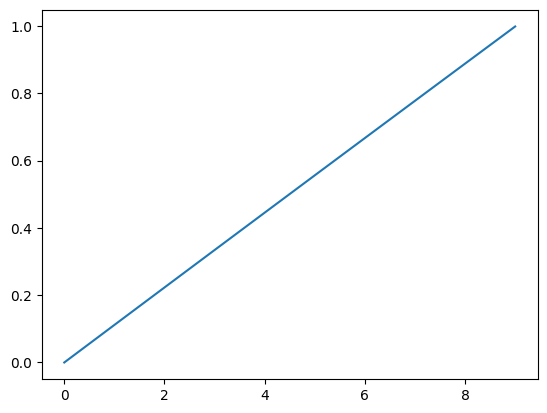

In [353]:
net = ThalamoCortical(1, 8)
net.cortical_activity = torch.ones_like(net.cortical_activity) * 0.3
test_input_lick = torch.ones(size=(int(1/.1),))

cortical_series = []
for t in range(test_input_lick.shape[0]):
    cortical_out = net(test_input_lick[t])
    cortical_series.append(cortical_out.item())

print(cortical_series)
plt.plot(cortical_series)
plt.show()